# 1

## 1.a)

 Antes de iniciar el desarrollo del sistema, necesitamos definir información implicita en el enunciado, como es una reacción irreversible elemental la velocidad de reacción corresponde a
$$
r=k(T°)C_AC_B
$$
 Tambien se nos entregan las entalpias de formación, por lo que se calcula $H_{r1}$
$$
\triangle H_{r1}=\triangle H_C°-\triangle H_A°-\triangle H_B°=-6 \frac{kcal}{mol}=-6000 \frac{cal}{mol}
$$
 Sin embargo, es importante recordar que la entalpia de reacción tiene un segundo factor
$$
\triangle H_{r2}=\triangle H_{r1}+\int_{T_1°}^{T_2°} \triangle cpdt°
$$
 Por lo que usamos los cp de los reactantes y productos del enunciado(que son independientes a la temperatura) para determinar una forma de expresar la entalpia de reacción a lo largo del sistema
$$
\triangle H_{r2}=\triangle H_{r1}+(C_{P_C}-2C_{P_A})(T_2°-T_1°)=-6000\frac{cal}{mol}
$$
 Donde es importante recordar que nos entregan las entalpias de formación a 0 grados celsius, por lo que esta tendra que ser nuestra temperatura de referencia a la hora de trabajar.
 Por ultimo, tambien podemos definir la constante $k_1$ en función de la temperatura, como nos entregan la energia de activación asumimos que se puede definir mediante arrhenius y tenemos
$$
k_1(T°)=Ae^{\frac{-E_a}{RT°}}
$$
 Como tenemos el valor $E_a$ y un valor de k en el enunciado, reemplazaremos estos datos para obtener A
 Con eso definido, empezamos a resolver la pregunta.
 
 Primero observamos que $C_Ao=C_Bo$ y que estos dos poseen la misma relación estequiometrica, por lo que podemos decir que $C_A=C_B$ durante todo el proceso de reacción. Con esto definido procedemos a escribir la relación entre el producto y los reactantes
$$
C_C=C_{Ao}X_A
$$
 Con todo esto definido, solo nos falta escribir el balance de masa y energia del sistema
 Primero tenemos el balance de masa
$$
\frac{dC_A}{dt}=r_A
$$
 Para finalizar, se define la ecuación de energia, cabe destacar que todo lo desarrollado previamente aplica para los tres incisos, pero el balance de energia varia en cada apartado, para este tenemos
$$
\sum_{i=1}^{n} H_i\frac{dN_i}{dt} + \sum_{i=1}^{n} N_i\frac{dH_i}{dt}=0
$$
 Esta ecuación se debe a que se presenta acumulación en el sistema(batch), pero no hay flujo de entrada o salida y para este apartado se esta trabajando de manera adiabatica
 Ahora se procede a desarrollar más la ecuación para tener la temperatura en función del tiempo
$$
0=-r_AV\triangle H_{rx}+\frac{dT°}{dt}2Cp_{A}C_{Ao}V
$$
$$
\frac{dT°}{dt}=\frac{r_AV\triangle H_{rx}}{{2Cp_{A}C_{Ao}V}}
$$
 Con el sistema de ecuaciones listo, se procede a resolver el sistema de ecuaciones

In [190]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
from scipy.integrate import solve_ivp

In [191]:
# primero ingresamos valores constantes
Ea=100  #cal/mol
R=1.9872   #cal/molK
Hrx=-6000 #cal/mol
V=10  #L
CAo=0.1   #mol/L
To=27+273   #en K

Cpa=15   #cal/molK
Ta=27+273 #K

def k1(T):
    A=0.01*np.exp(Ea/(R*300))
    return A*np.exp(-Ea/(R*T))





In [192]:
#Ahora se definiran terminos que no estan directo
def sistema_EDOs(t,y):
    CA,T=y
    ra=k1(T)*CA**2 # en verdad aqui se calcula -rA
    dCA_Dt=-ra   
    dT_dt=(-ra*Hrx*V)/(2*V*Cpa*CAo - V*(0.1 -  Cpa) * 30) 
    return [dCA_Dt,dT_dt]

In [193]:
# con esto podemos obtener la concentración del producto, es importante recordar que CB=CA
yo=[CAo,To]
t_eval=[0,10000]
sol = solve_ivp(sistema_EDOs, t_eval, y0=yo, method='RK45')
C_A_o=np.ones(len(sol.t))*CAo

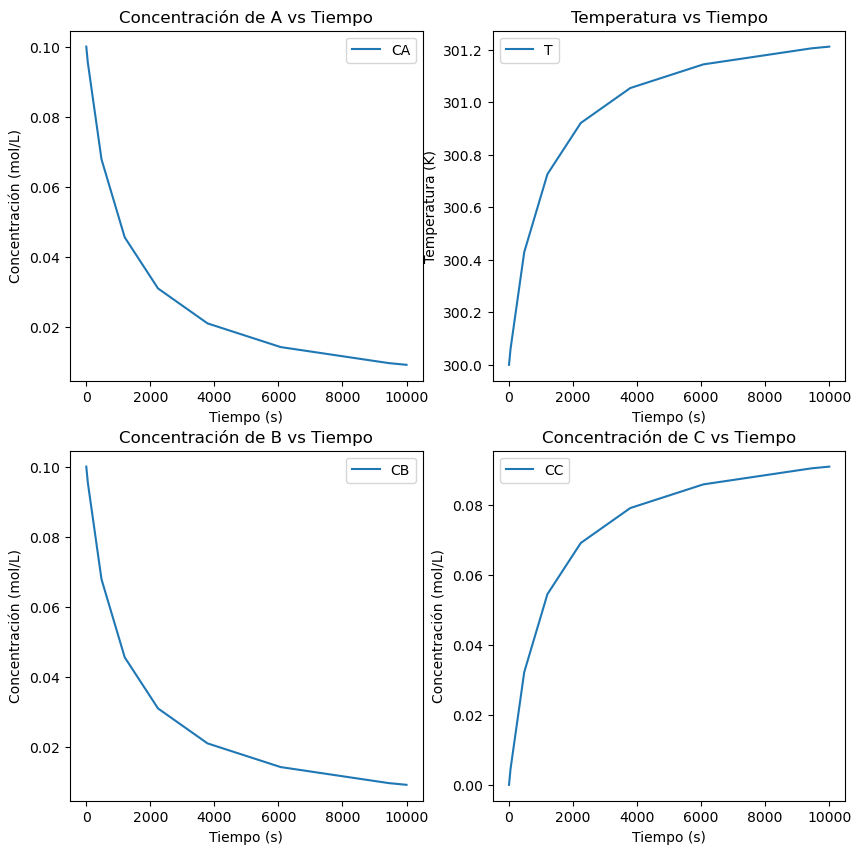

In [194]:
#graficamos los resultados
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(sol.t, sol.y[0], label='CA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Concentración de A vs Tiempo')
plt.legend()
plt.subplot(2,2,2)
plt.plot(sol.t, sol.y[1], label='T')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura vs Tiempo')
plt.legend()
plt.subplot(2,2,3)
plt.plot(sol.t, sol.y[0], label='CB')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Concentración de B vs Tiempo')
plt.legend()
plt.subplot(2,2,4)
plt.plot(sol.t, C_A_o-sol.y[0], label='CC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Concentración de C vs Tiempo')
plt.legend()
plt.show()



## 1.b)

Todo el procedimiento al caso de "a" es analogo, lo unico que varia es el balance de energia, ya que ahora se tiene un termino extra que corresponde al termino de perdidas de calor
$$
Q=-r_AV\triangle H_{rx}+\frac{dT°}{dt}2Cp_{A}C_{Ao}V
$$
Donde Q corresponde a $UA(T°-T_a°)$
$$
\frac{dT°}{dt}=\frac{(r_AV\triangle H_{rx})-UA(T°-T_a°)}{{2Cp_{A}C_{Ao}V}}
$$

In [195]:
# redefinimos la función con este nuevo termino
# Ahora se definiran terminos que no estan directo
def sistema_EDOs(t,y, UA):
    CA,T=y
    ra=k1(T)*CA**2  # en verdad aqui se calcula -rA
    dCA_Dt=-ra   
    dT_dt=((-ra*Hrx*V)-UA*(T-Ta))/(2*V*Cpa*CAo)
    return [dCA_Dt,dT_dt]

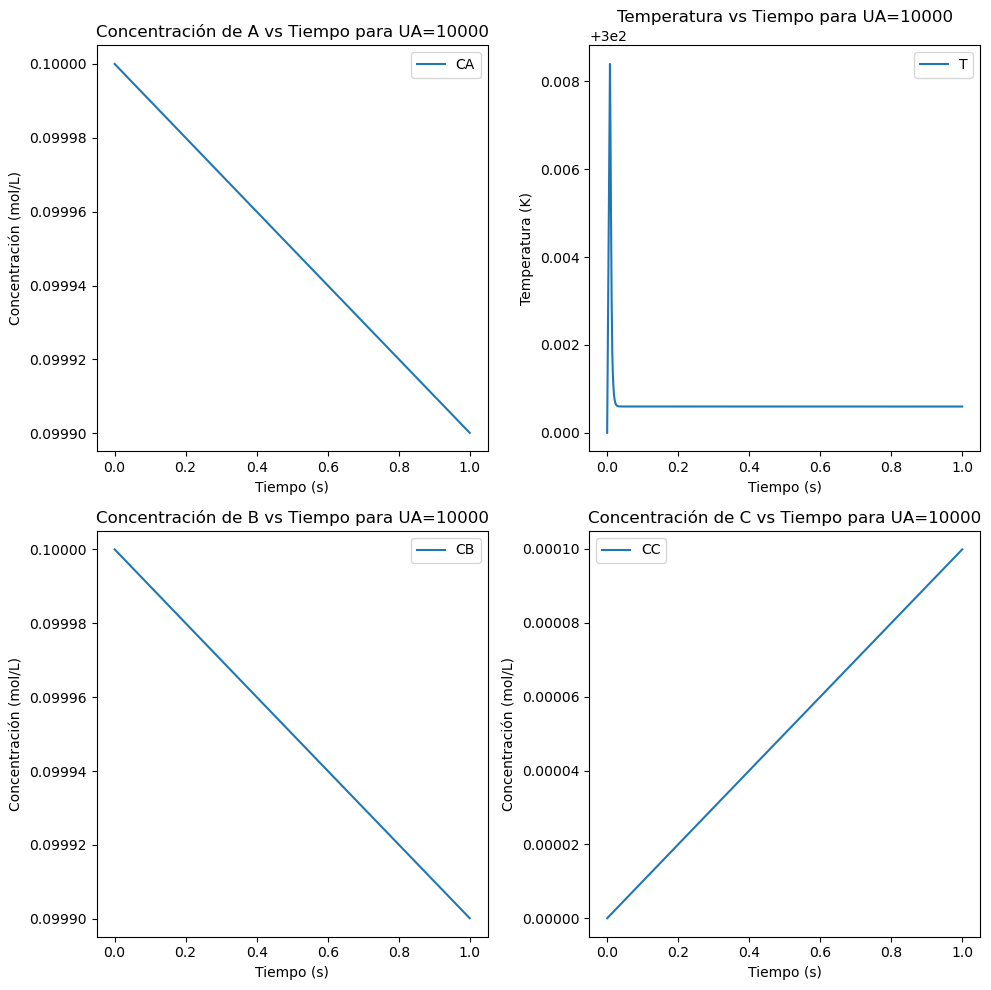

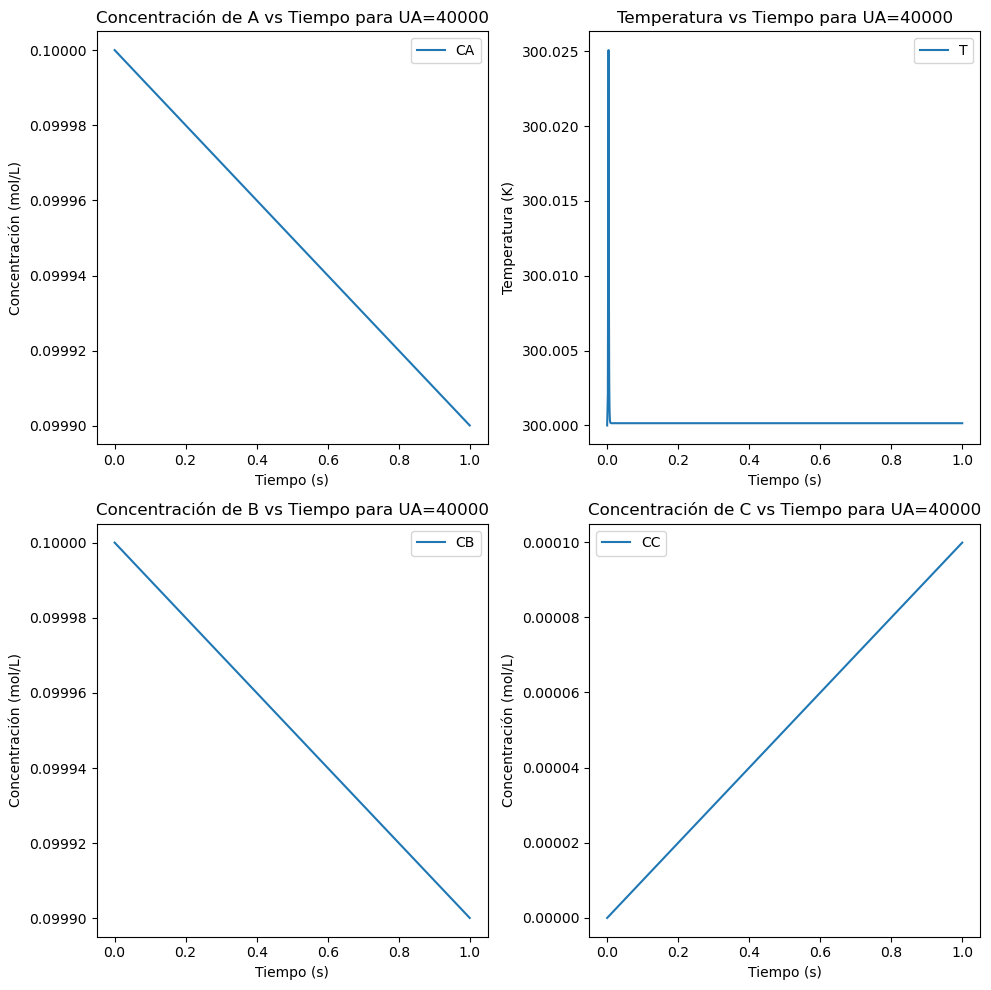

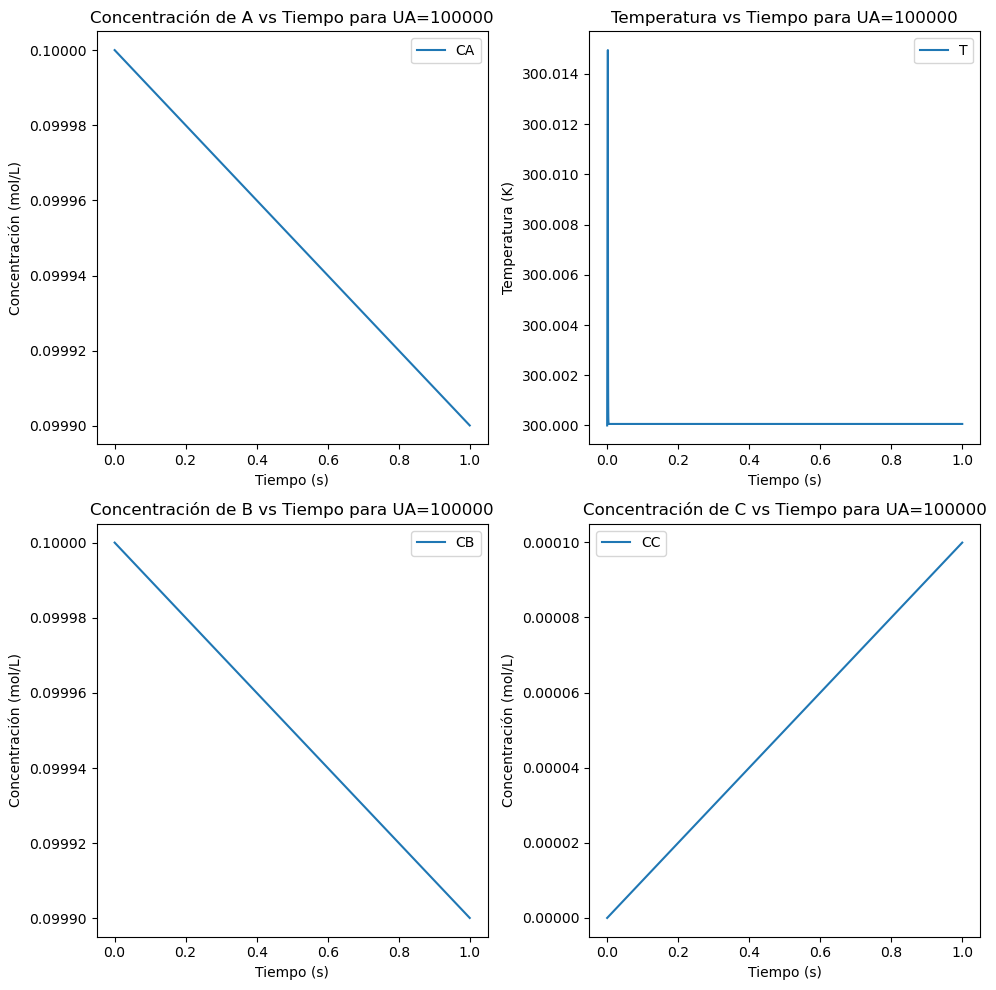

In [196]:
UA_list=[10**4,4*10**4,10**5]
for i in range(len(UA_list)):
    UA=UA_list[i]
    yo=[CAo,To]
    t_eval=[0,1]
    sol = solve_ivp(sistema_EDOs, t_eval, y0=yo, method='LSODA',
    args = (UA,))
    C_A_o=np.ones(len(sol.t))*CAo
    # graficamos los resultados
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(sol.t, sol.y[0], label='CA')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Concentración (mol/L)')
    plt.title('Concentración de A vs Tiempo para UA=' +str(UA))
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(sol.t, sol.y[1], label='T')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (K)')
    plt.title('Temperatura vs Tiempo para UA=' +str(UA))
    plt.legend()
    plt.subplot(2,2,3)
    plt.plot(sol.t, sol.y[0], label='CB')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Concentración (mol/L)')
    plt.title('Concentración de B vs Tiempo para UA=' +str(UA))
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(sol.t, C_A_o-sol.y[0], label='CC')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Concentración (mol/L)')
    plt.title('Concentración de C vs Tiempo para UA=' +str(UA))
    plt.legend()
    plt.tight_layout()
    plt.show()

## 1.c)

 Proceso analogo al previo, solo se cambia  a 10 To iniciales

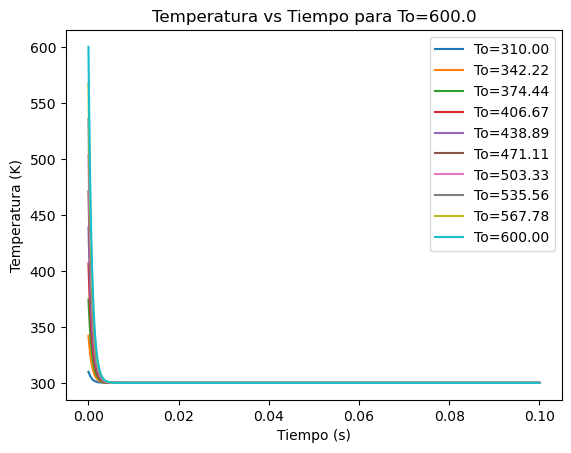

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [220]:
UA=4*10**4
To=np.linspace(310,600,10)
fig, ax = plt.subplots()
for i in range(len(To)):
    yo=[CAo,To[i]]
    t_eval=[0,.1]
    sol = solve_ivp(sistema_EDOs, t_eval, y0=yo, method='LSODA', max_step=0.1,
    args = (UA,))
    C_A_o=np.ones(len(sol.t))*CAo
    # graficamos los resultado.s
    plt.figure(figsize=(5,5))
    ax.plot(sol.t, sol.y[1], label=f'To={To[i]:.2f}')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Temperatura (K)')
ax.set_title('Temperatura vs Tiempo para To=' +str(To[i]))
ax.legend()
plt.show()


# 2.

## 2.a)

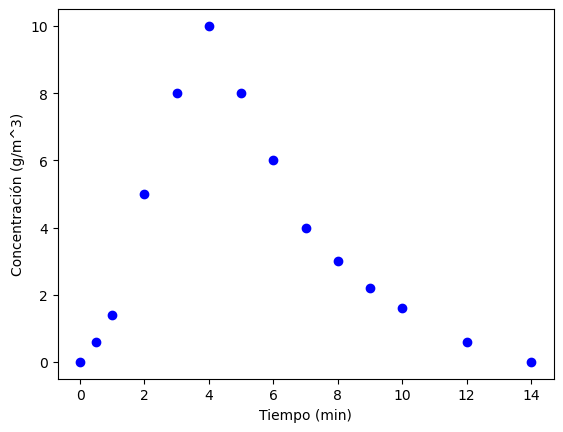

In [198]:
tiempo = [0, 0.5, 1, 2,3,4,5,6,7,8,9,10, 12, 14]
conc = [0, 0.6, 1.4, 5, 8, 10, 8, 6, 4, 3, 2.2, 1.6, 0.6, 0]

# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, conc, color = 'blue', label = 'Datos experimentales')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración (g/m^3)')
plt.show()

## 2.b)

Para construir la curva normalizada, se deben normalizar los datos con tal de que estos sumen 1. Para esto se dividen los datos por la integral bajo los mismos (consideramos datos continuos).

In [199]:
area_cont = integrate.trapezoid(conc, tiempo)
area_disc = np.sum(conc[1:] * np.diff(tiempo))
print(f'Area por integral', area_cont)
print(f'Area por sumatoria', area_disc)

Area por integral 51.150000000000006
Area por sumatoria 50.00000000000001


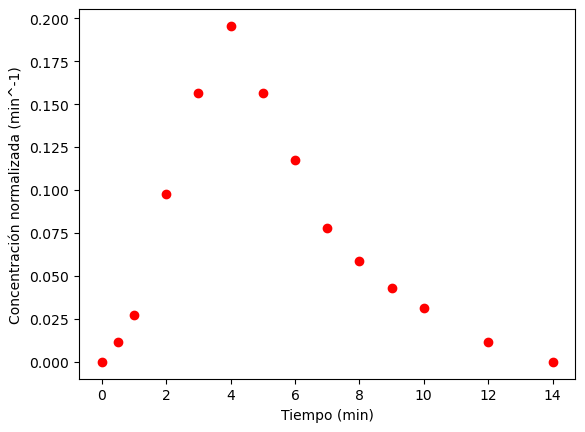

In [200]:
norm_conc = conc/integrate.trapezoid(conc, tiempo)  # normalizamos los datos
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, norm_conc, color = 'red', label = 'Datos normalizados')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración normalizada (min^-1)')
plt.show()

In [201]:
# verificamos que sume 1
integrate.trapezoid(norm_conc, tiempo) # cercano a 1

np.float64(0.9999999999999998)

## 2.c)

Para generar la curva de probabilidad acumulada debemos recordar que:

$$
F(t) = \int_{-\infty}^t f(\tau) d\tau
$$
O su forma discerta
$$
P(t) = \sum_{\tau=-\infty}^{t} p(\tau)
$$

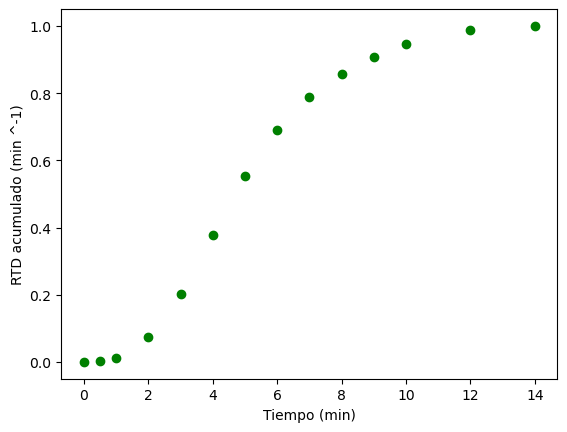

In [202]:
com_conc_norm = integrate.cumulative_trapezoid(norm_conc, tiempo, initial=0)
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, com_conc_norm, color = 'green')
plt.xlabel('Tiempo (min)')
plt.ylabel('RTD acumulado (min ^-1)')
plt.show()

# 2.d)

El tiempo medio de residencia puede encotrarse mediante la siguiente formula:

$$
\mu_{RTD} = \int_{-\infty}^{\infty} t \cdot E(t) dt
$$
Lo que nos permite calcular la media de los datos con facilidad.

Tiempo medio de residencia: 5.11 min


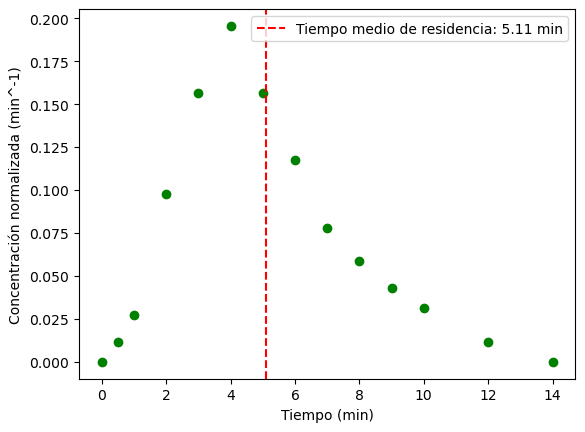

In [203]:
mean_rtd = integrate.trapezoid(np.array(tiempo)*np.array(norm_conc), tiempo)    
print(f'Tiempo medio de residencia: {mean_rtd:.2f} min')
plt.figure(dpi = 100)
plt.scatter(tiempo, norm_conc, color = 'green')
plt.axvline(mean_rtd, color='red', linestyle='--', label=f'Tiempo medio de residencia: {mean_rtd:.2f} min')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración normalizada (min^-1)')
plt.legend()
plt.show()

# 2.e)

De la misma forma que se calculó la media. La varianza de una distribución puede ser calculada mediante la siguiente formula:

$$
\sigma^2_{RTD} = \int_{-\infty}^{\infty} E(t) (t - \mu_{RTD})^2 dt
$$

In [204]:
variance_rtd = integrate.trapezoid(norm_conc * (np.array(tiempo) - mean_rtd)**2, tiempo)
print(f'Varianza del tiempo de residencia: {variance_rtd:.2f} min^2')

Varianza del tiempo de residencia: 6.10 min^2


## 2.f)

La cantidad de trazador utilizado corresponde al área bajo al curva de la distribución de tiempos de residencia no-normalizada.

In [205]:
total_trace = integrate.trapezoid(conc, tiempo) * 0.01 
print(f'Cantidad total de trazador utilizado: {total_trace:.2f} g')

Cantidad total de trazador utilizado: 0.51 g


## 2.g)

Desde las distribuciones de probabilidad, se tiene que 
$$
P(a<x\leq b) = P(x\leq b) - P(a<x)
$$

Por lo cuál se puede hacer el mismo procedimiento.

In [206]:
# concentraciones menores a 6
tiempo_menor_6 = np.array(tiempo)[np.array(tiempo) <= 6]
tiempo_menor_3 = np.array(tiempo)[np.array(tiempo) < 3] # no inclusive
prob_menor_6 = integrate.trapezoid(norm_conc[np.array(tiempo) <= 6], tiempo_menor_6)
prob_menor_3 = integrate.trapezoid(norm_conc[np.array(tiempo) < 3], tiempo_menor_3)
print(f'proporción menor o igual a 6: {prob_menor_6:.4f}')
print(f'proporción menor a 3: {prob_menor_3:.4f}')
prob_pedida = prob_menor_6 - prob_menor_3
print(f'Probabilidad de que el tiempo de residencia esté entre 3 y 6 minutos: {prob_pedida:.4f}')

proporción menor o igual a 6: 0.6911
proporción menor a 3: 0.0753
Probabilidad de que el tiempo de residencia esté entre 3 y 6 minutos: 0.6158


## 2.f)

Fracción que paso menos de 2 minutos.

In [207]:
tiempo_menor_2 = np.array(tiempo)[np.array(tiempo) < 2] # no inclusive
prob_menor_2 = integrate.trapezoid(norm_conc[np.array(tiempo) < 2], tiempo_menor_2)
print(f'Fracción que pasó menos de 2 minutos: {prob_menor_2:.4f}')

Fracción que pasó menos de 2 minutos: 0.0127


# 3.

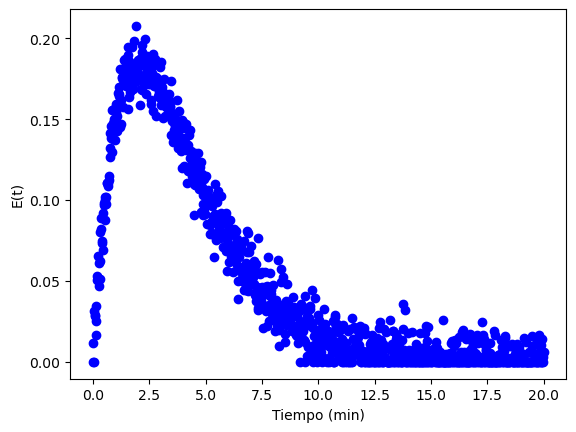

In [208]:
# descargamos los datos
import pandas as pd
data = pd.read_csv('RTD.csv')
tiempo = data['t']
rtd = data['E(t)']
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'blue', label = 'Datos experimentales')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.show()

# 3.b

In [209]:
# verificamos que sume 1
integrate.trapezoid(rtd, tiempo) # cercano a 1
# desde el grafico se ve que existe cierto ruido por lo cual se espere que no sume exactamente 1
print(f'area bajo la curva: {integrate.trapezoid(rtd, tiempo):.4f}')

area bajo la curva: 1.0149


# 3.c

Tiempo medio de residencia: 4.29 min
Varianza del tiempo de residencia: 10.83 min^2
Moda del tiempo de residencia: 1.90 min


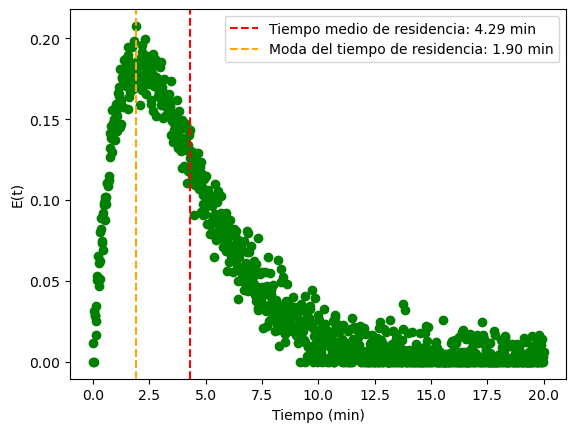

In [210]:
# calculamos la media
mean_rtd = integrate.trapezoid(np.array(tiempo)*np.array(rtd), tiempo)    
print(f'Tiempo medio de residencia: {mean_rtd:.2f} min')
# calculamos la varianza
variance_rtd = integrate.trapezoid(rtd * (np.array(tiempo) - mean_rtd)**2, tiempo)
print(f'Varianza del tiempo de residencia: {variance_rtd:.2f} min^2')
# calculamos la moda
mode_index = np.argmax(rtd)
mode_rtd = tiempo[mode_index]
print(f'Moda del tiempo de residencia: {mode_rtd:.2f} min')

# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'green')
plt.axvline(mean_rtd, color='red', linestyle='--', label=f'Tiempo medio de residencia: {mean_rtd:.2f} min')
plt.axvline(mode_rtd, color='orange', linestyle='--', label=f'Moda del tiempo de residencia: {mode_rtd:.2f} min')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.legend()
plt.show()

# 3.d.

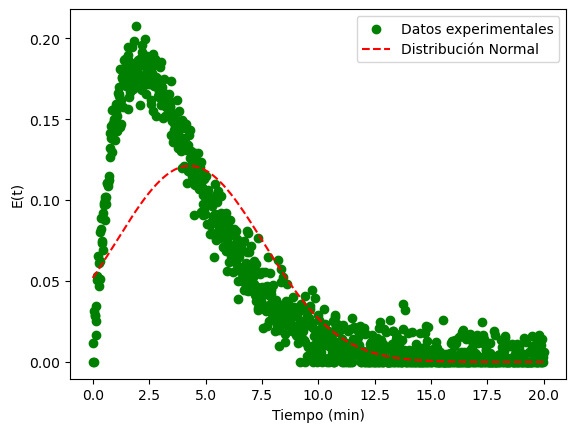

In [211]:
# normal distribution
mu = mean_rtd
sigma = np.sqrt(variance_rtd)
x = np.linspace(0, max(tiempo), 1000)
norm_pdf = stats.norm.pdf(x, mu, sigma)
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'green', label='Datos experimentales')
plt.plot(x, norm_pdf, color='red', linestyle='--', label='Distribución Normal')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.legend()
plt.show()

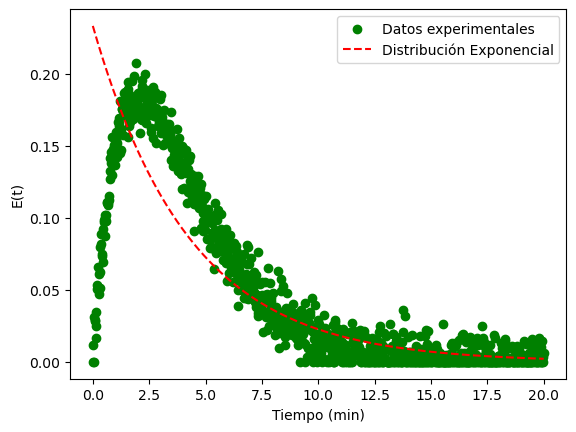

In [212]:
# exponencial
exp_pdf = stats.expon.pdf(x, scale=mean_rtd)
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'green', label='Datos experimentales')
plt.plot(x, exp_pdf, color='red', linestyle='--', label='Distribución Exponencial')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.legend()
plt.show()

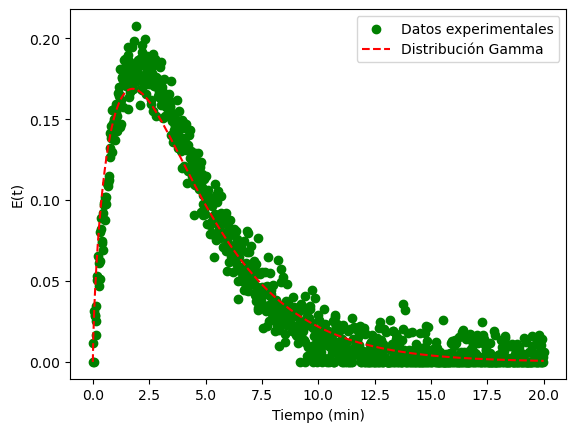

In [213]:
# gamma
a = mean_rtd**2 / variance_rtd
theta = variance_rtd / mean_rtd
gamma_pdf = stats.gamma.pdf(x, a=a, scale=theta)
# graficamos
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'green', label='Datos experimentales')
plt.plot(x, gamma_pdf, color='red', linestyle='--', label='Distribución Gamma')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.legend()
plt.show()

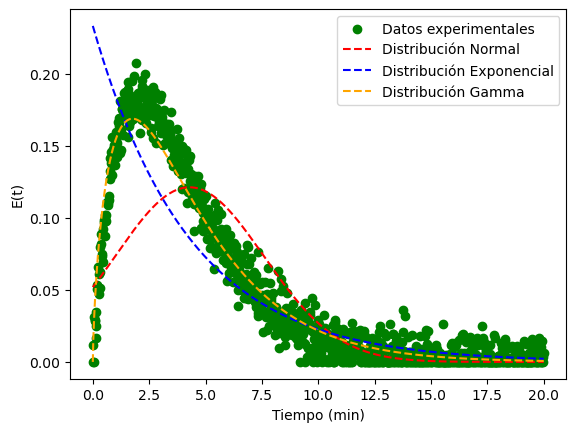

In [214]:
# todo junto
plt.figure(dpi = 100)
plt.scatter(tiempo, rtd, color = 'green', label='Datos experimentales')
plt.plot(x, norm_pdf, color='red', linestyle='--', label='Distribución Normal')
plt.plot(x, exp_pdf, color='blue', linestyle='--', label='Distribución Exponencial')
plt.plot(x, gamma_pdf, color='orange', linestyle='--', label='Distribución Gamma')
plt.xlabel('Tiempo (min)')
plt.ylabel('E(t)')
plt.legend()

In [215]:
integrate.trapezoid(gamma_pdf, x)  # verificar que sume 1

np.float64(0.9981121951427835)